# Liver disease classification

### This ML model can predict that you have a Liver disease or a Posibility To Have a Liver disease

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import And Desplay The Data

In [2]:
data = pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data['Alamine_Aminotransferase'].min()

10

In [4]:
data.shape

(583, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Feature Engineering

### Find The Missing Values

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Encode the categorical data

In [9]:
data['Gender'].value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

In [10]:
### Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [11]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Feture Selection

### Correlation And Heat Map

In [12]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Gender,0.055881,1.000000,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,-0.081349
Total_Bilirubin,0.011000,0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,-0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


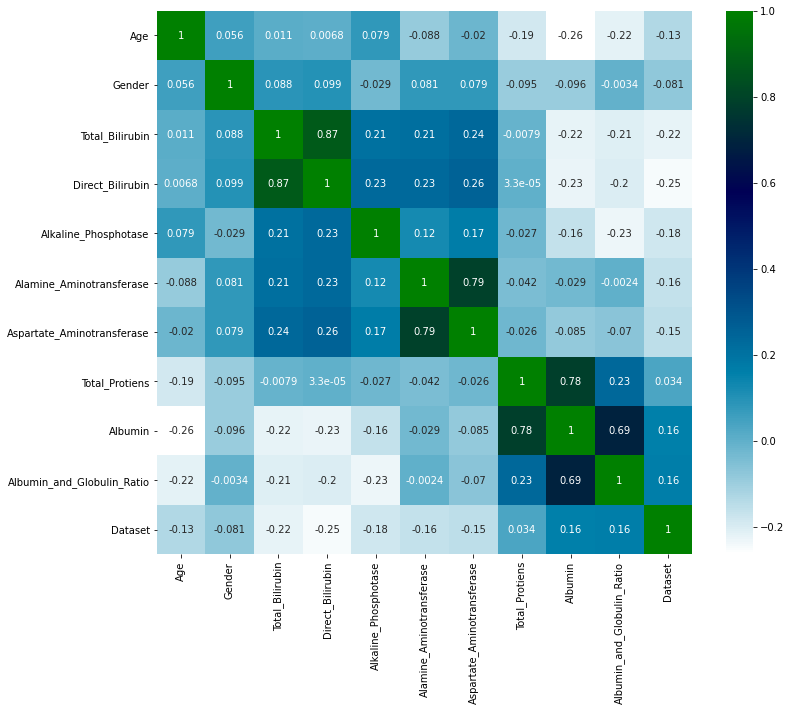

In [13]:
plt.figure(figsize = (12,10))
g = sns.heatmap(data.corr(),annot = True , cmap = "ocean_r") 

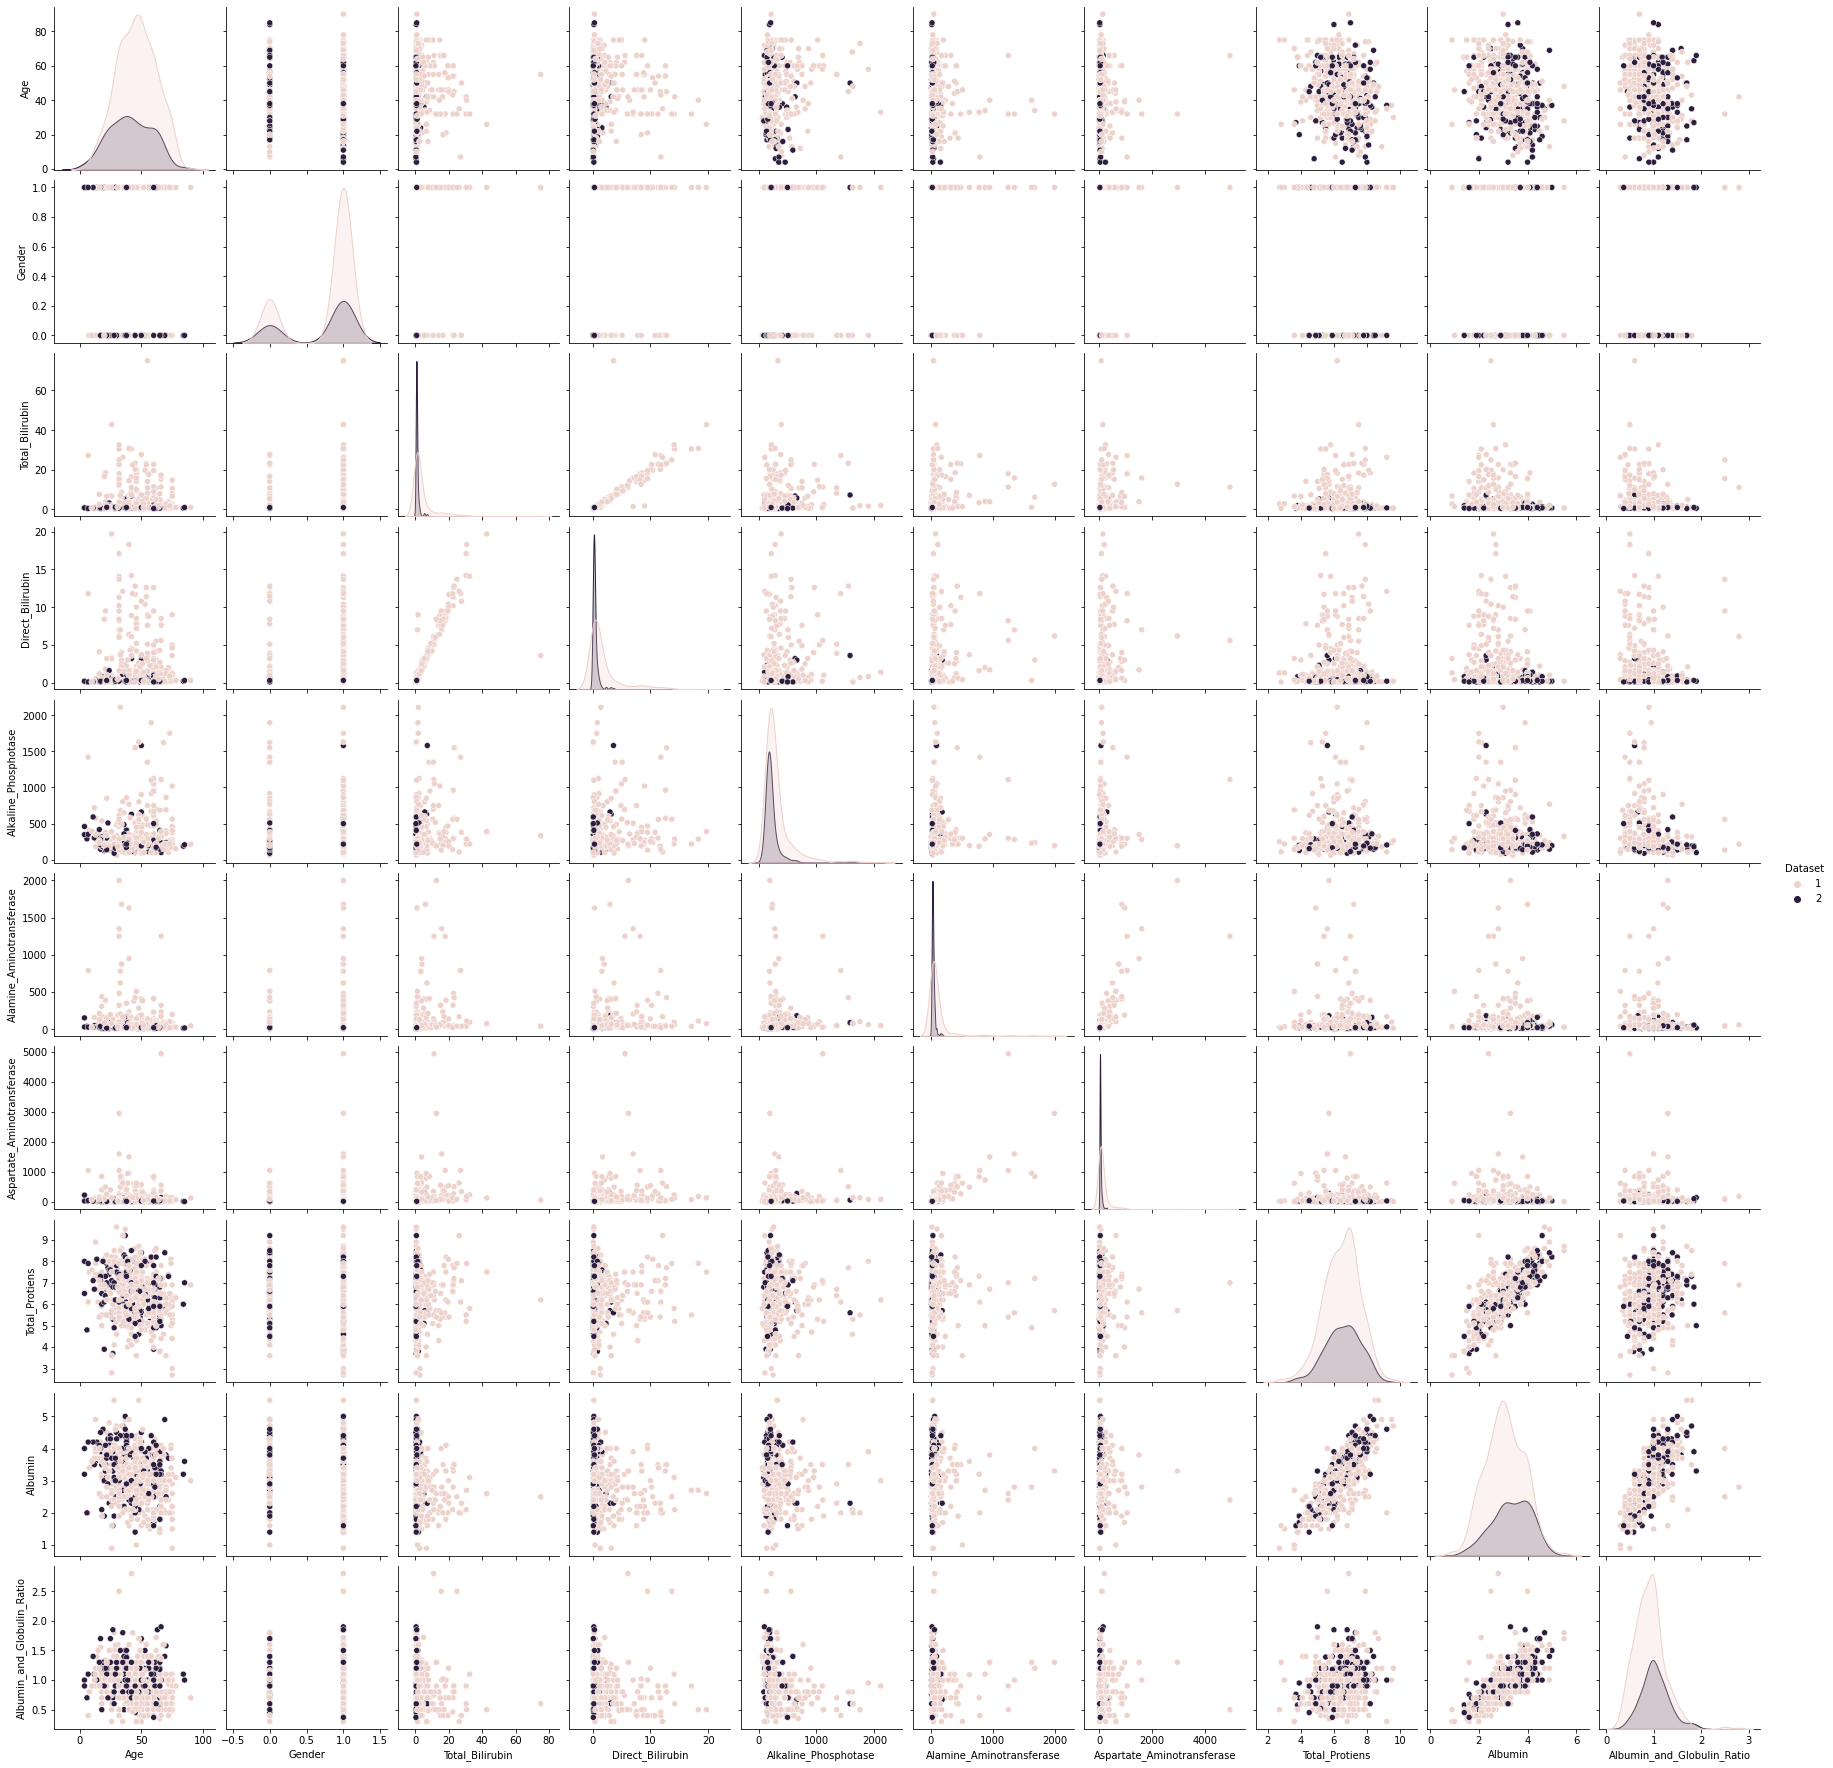

In [14]:
sns.pairplot(data,hue='Dataset')

## Splite The Data In Dependent And Independent

In [15]:
X = data.drop('Dataset',axis = 1)
y = data['Dataset']

### Drop The Highly Correlated columns

In [16]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

1

In [18]:
### 80%  Correlated 
corr_features 

{'Direct_Bilirubin'}

In [19]:
data.drop(corr_features,axis=1,inplace=True)
data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,195,27,59,7.3,2.4,0.40,1


In [20]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [21]:
data['Albumin'].max()

5.5

In [22]:
data.shape

(579, 10)

### Feature importence

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.12631098 0.03675835 0.10868242 0.11897101 0.12139097 0.10732465
 0.11362661 0.08182876 0.08988629 0.09521995]


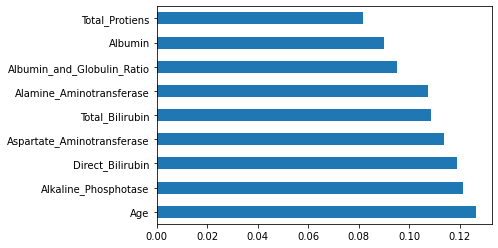

In [25]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(9).plot(kind = 'barh')
plt.show()

## Splite The Data In Train And Test

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
X_train.shape

(463, 10)

In [28]:
X_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
445,17,1,0.9,0.2,279,40,46,7.3,4.0,1.2
407,12,1,1.0,0.2,719,157,108,7.2,3.7,1.0
119,32,1,18.0,8.2,298,1250,1050,5.4,2.6,0.9
521,55,1,4.4,2.9,230,14,25,7.1,2.1,0.4
498,68,1,1.8,0.5,151,18,22,6.5,4.0,1.6


In [29]:
X_test.shape

(116, 10)

## Train The Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=20,max_features='auto')
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[75  7]
 [27  7]]
0.7068965517241379
              precision    recall  f1-score   support

           1       0.74      0.91      0.82        82
           2       0.50      0.21      0.29        34

    accuracy                           0.71       116
   macro avg       0.62      0.56      0.55       116
weighted avg       0.67      0.71      0.66       116



## import pickle

In [33]:
import pickle
pkl_file = open("Liver.pkl",'wb')
pickle.dump(classifier,pkl_file)
pkl_file.close()

In [34]:
Livermodel = pickle.load(open('Liver.pkl','rb'))
Livermodel.predict([[65, 0, 0.7, 0.1, 187, 16, 18, 6.8, 3.3, 0.90]])

array([1], dtype=int64)